In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import signal
from scipy.optimize import leastsq
import statsmodels.tsa.stattools as stattools
import statsmodels.graphics.tsaplots as tsaplots
import statsmodels.tsa.statespace.sarimax as sarimax

In [2]:
from pmdarima import auto_arima
from tbats import TBATS, BATS

In [3]:
raw_data=pd.read_excel("/Users/rkundeti/Downloads/cards_data.xlsx")

In [ ]:
raw_data.head(5)

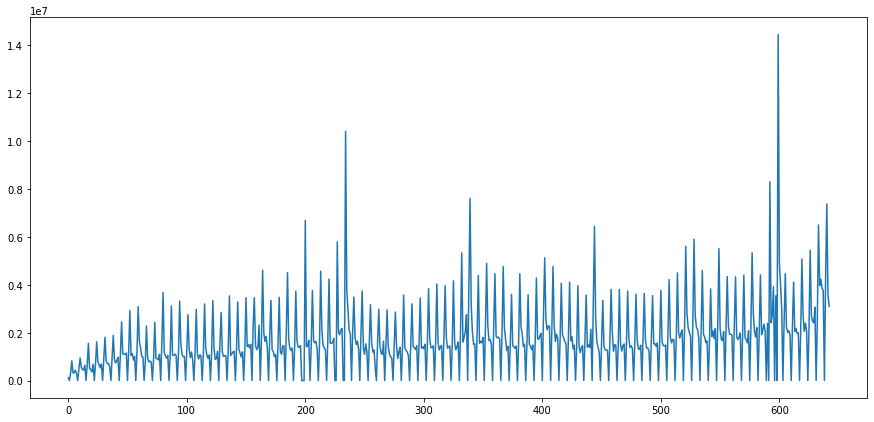

In [4]:
plt.figure(figsize = (15,7))
plt.plot(raw_data['Amt'])

In [5]:
raw_data.shape

(643, 2)

# SARIMAX 

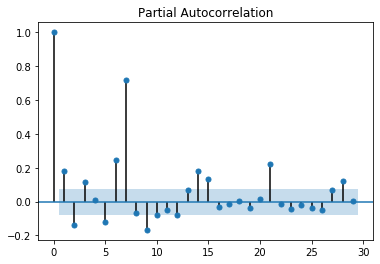

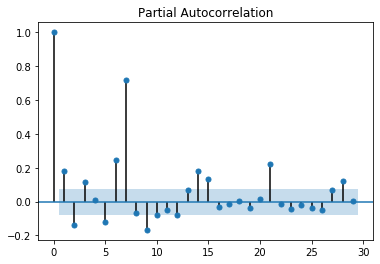

In [6]:
data=raw_data.Amt.values
tsaplots.plot_pacf(data)


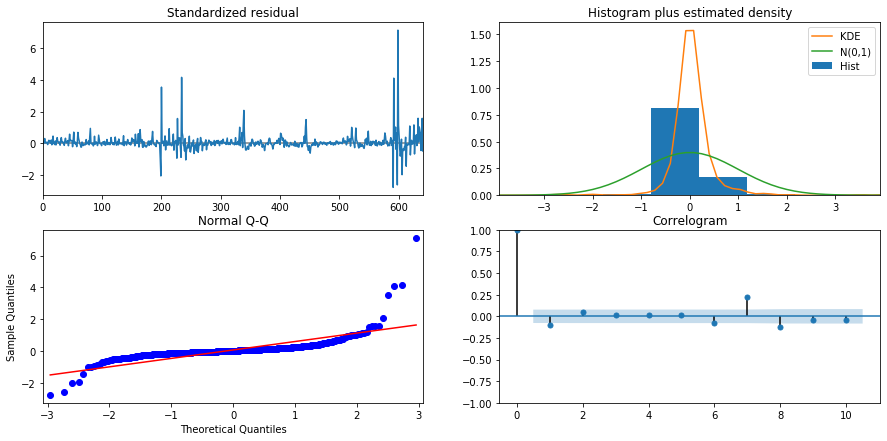

In [8]:
sarima = sarimax.SARIMAX(data, order=(1, 0, 1), seasonal_order=(1, 0, 1, 7))
sarima = sarima.fit()
pred = sarima.predict()
sarima.plot_diagnostics(figsize=(15, 7))
plt.show()

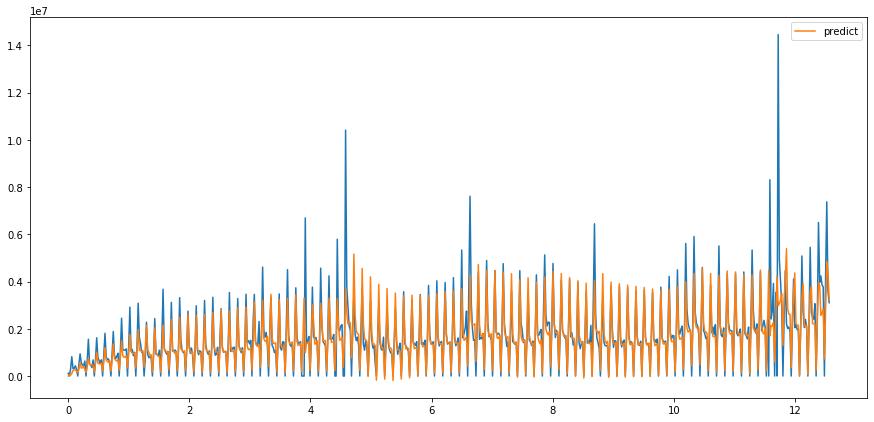

In [9]:
N = len(data)
t = np.linspace(0, 4*np.pi, N)
plt.figure(figsize=(15,7))
plt.plot(t, data)
plt.plot(t, pred, label='predict')
plt.legend()
plt.show()

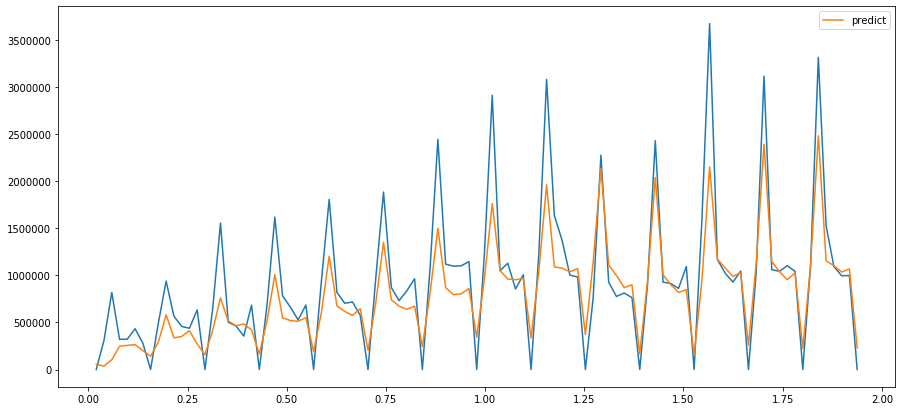

In [10]:
plt.figure(figsize=(15,7))
plt.plot(t[1:100], data[1:100])
plt.plot(t[1:100], pred[1:100], label='predict')
plt.legend()
plt.show()

# Tune parameters automagically

In [11]:
sarima = auto_arima(data,
                   start_p=0, d=None, start_q=0, max_p=5, max_d=2, max_q=5,
                   start_P=0, D=None, start_Q=1, max_P=5, max_D=2, max_Q=5,
                   m = 7, seasonal=True)
sarima.summary()

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Conve

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  643
Model:             SARIMAX(2, 1, 2)x(4, 0, 4, 7)   Log Likelihood               -9806.413
Date:                           Thu, 19 Dec 2019   AIC                          19640.825
Time:                                   13:24:25   BIC                          19703.329
Sample:                                        0   HQIC                         19665.083
                                           - 643                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.009e+04    4.4e+04      0.457      0.648   -6.62e+04    1.06e+05
ar.L1         -1.0485      0.696     -1.506      0.132      -2.413       0.316
ar.L2         -0.0996      0.101     -0.984      0.325      -0.298       0.099
ma.L1          0.1081      0.694      0.156      0.876      -1.253       1.469
ma.L2         -0.8003      0.598     -1.339      0.181      -1.971       0.371
ar.S.L7       -1.3072      0.395     -3.309      0.001      -2.082      -0.533
ar.S.L14       0.5095      0.329      1.550      0.121      -0.135       1.154
ar.S.L21       1.3008      0.343      3.789      0.000       0.628       1.974
ar.S.L28       0.4128      0.309      1.334      0.182      -0.194       1.019
ma.S.L7        1.6846      0.389      4.336      0.000       0.923       2.446
ma.S.L14       0.0575      0.476      0.121      0.904      -0.875       0.990
ma.S.L21      -1.2271      0.215     -5.715      0.000      -1.648      -0.806
ma.S.L28      -0.5587      0.203     -2.752      0.006      -0.957      -0.161
sigma2       2.06e+12      0.002   1.02e+15      0.000    2.06e+12    2.06e+12
===================================================================================
Ljung-Box (Q):                       52.52   Jarque-Bera (JB):             44009.72
Prob(Q):                              0.09   Prob(JB):                         0.00
Heteroskedasticity (H):               3.34   Skew:                             3.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        43.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.82e+30. Standard errors may be unstable.
"""

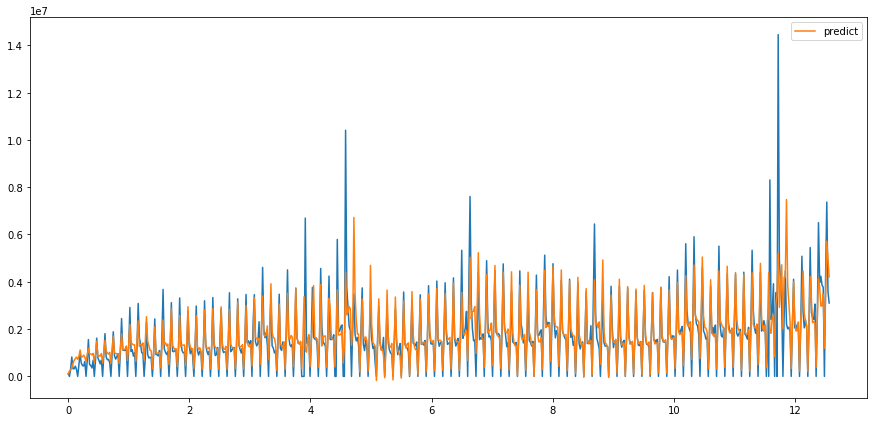

In [12]:
pred = sarima.predict_in_sample()
plt.figure(figsize=(15,7))
plt.plot(t, data)
plt.plot(t, pred, label='predict')
plt.legend()
plt.show()

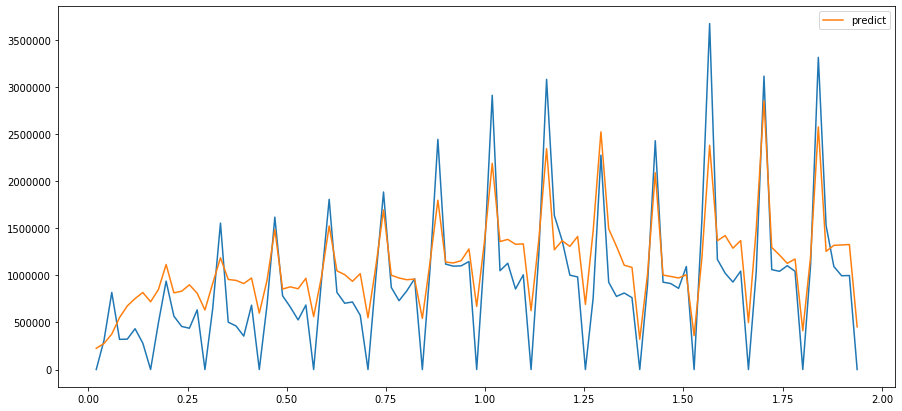

In [13]:
plt.figure(figsize=(15,7))
plt.plot(t[1:100], data[1:100])
plt.plot(t[1:100], pred[1:100], label='predict')
plt.legend()
plt.show()

# Dynamic Harmonic Regression with ARIMA error

In [14]:
# Turning K for annual seasional period
for i in range(1,7):
  exog = pd.DataFrame({'post_date': pd.to_datetime(raw_data['post_date'])})
  exog = exog.set_index(pd.PeriodIndex(exog.post_date.values, freq='D'))
  exog['sin365_' + str(i)] = np.sin(2 * i * np.pi * exog.index.dayofyear / 365.25)
  exog['cos365_' + str(i)] = np.cos(2 * i * np.pi * exog.index.dayofyear / 365.25)
  exog = exog.drop(columns=['post_date'])
  sarimaF = auto_arima(raw_data['Amt'], exog, seasonal=True, m=7)
  print('For K =', i, 'AIC = ', sarimaF.aic())

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimiza

For K = 1 AIC =  19428.035532586146


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimiza

For K = 2 AIC =  19428.585263324225


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961

For K = 3 AIC =  19428.177146252783


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimiza

For K = 4 AIC =  19427.50068577697


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961

For K = 5 AIC =  19428.267044029097


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961

For K = 6 AIC =  19425.63214462914


In [15]:
i = 1
exog = pd.DataFrame({'post_date': pd.to_datetime(raw_data['post_date'])})
exog = exog.set_index(pd.PeriodIndex(exog.post_date.values, freq='D'))
exog['sin365_' + str(i)] = np.sin(2 * i * np.pi * exog.index.dayofyear / 365.25)
exog['cos365_' + str(i)] = np.cos(2 * i * np.pi * exog.index.dayofyear / 365.25)
exog = exog.drop(columns=['post_date'])
sarimaF = auto_arima(raw_data['Amt'], exog, seasonal=True, m=7)

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimiza

In [16]:
sarimaF.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  643
Model:             SARIMAX(5, 1, 2)x(1, 0, 2, 7)   Log Likelihood               -9700.018
Date:                           Thu, 19 Dec 2019   AIC                          19428.036
Time:                                   13:58:25   BIC                          19490.540
Sample:                               05-13-2017   HQIC                         19452.293
                                    - 02-14-2019                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.252e+04    1.6e-07   2.03e+11      0.000    3.25e+04    3.25e+04
sin365_1   -1.008e+05    2.8e-09   -3.6e+13      0.000   -1.01e+05   -1.01e+05
cos365_1    1.934e+04      2e-09   9.67e+12      0.000    1.93e+04    1.93e+04
ar.L1         -2.7622      0.045    -61.310      0.000      -2.850      -2.674
ar.L2         -3.0743      0.083    -37.030      0.000      -3.237      -2.912
ar.L3         -2.0707      0.083    -24.906      0.000      -2.234      -1.908
ar.L4         -1.0326      0.063    -16.406      0.000      -1.156      -0.909
ar.L5         -0.2714      0.024    -11.386      0.000      -0.318      -0.225
ma.L1          1.9482      0.044     44.491      0.000       1.862       2.034
ma.L2          0.9532      0.042     22.873      0.000       0.871       1.035
ar.S.L7        0.9924      0.003    291.812      0.000       0.986       0.999
ma.S.L7       -0.6247      0.027    -23.514      0.000      -0.677      -0.573
ma.S.L14      -0.2134      0.038     -5.652      0.000      -0.287      -0.139
sigma2      8.509e+11   2.91e-13   2.92e+24      0.000    8.51e+11    8.51e+11
===================================================================================
Ljung-Box (Q):                       54.09   Jarque-Bera (JB):             36064.25
Prob(Q):                              0.07   Prob(JB):                         0.00
Heteroskedasticity (H):               3.18   Skew:                             2.77
Prob(H) (two-sided):                  0.00   Kurtosis:                        39.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.76e+39. Standard errors may be unstable.
"""

In [18]:
pred = sarimaF.predict_in_sample(exog)
plt.figure(figsize=(15,7))
plt.plot(data)
plt.plot(pred, label='predict')
plt.legend()
plt.show()

ConversionError: Failed to convert value(s) to axis units: array([Period('2017-05-13', 'D'), Period('2017-05-14', 'D'),
       Period('2017-05-15', 'D'), Period('2017-05-16', 'D'),
       Period('2017-05-17', 'D'), Period('2017-05-18', 'D'),
       Period('2017-05-19', 'D'), Period('2017-05-20', 'D'),
       Period('2017-05-21', 'D'), Period('2017-05-22', 'D'),
       Period('2017-05-23', 'D'), Period('2017-05-24', 'D'),
       Period('2017-05-25', 'D'), Period('2017-05-26', 'D'),
       Period('2017-05-27', 'D'), Period('2017-05-28', 'D'),
       Period('2017-05-29', 'D'), Period('2017-05-30', 'D'),
       Period('2017-05-31', 'D'), Period('2017-06-01', 'D'),
       Period('2017-06-02', 'D'), Period('2017-06-03', 'D'),
       Period('2017-06-04', 'D'), Period('2017-06-05', 'D'),
       Period('2017-06-06', 'D'), Period('2017-06-07', 'D'),
       Period('2017-06-08', 'D'), Period('2017-06-09', 'D'),
       Period('2017-06-10', 'D'), Period('2017-06-11', 'D'),
       Period('2017-06-12', 'D'), Period('2017-06-13', 'D'),
       Period('2017-06-14', 'D'), Period('2017-06-15', 'D'),
       Period('2017-06-16', 'D'), Period('2017-06-17', 'D'),
       Period('2017-06-18', 'D'), Period('2017-06-19', 'D'),
       Period('2017-06-20', 'D'), Period('2017-06-21', 'D'),
       Period('2017-06-22', 'D'), Period('2017-06-23', 'D'),
       Period('2017-06-24', 'D'), Period('2017-06-25', 'D'),
       Period('2017-06-26', 'D'), Period('2017-06-27', 'D'),
       Period('2017-06-28', 'D'), Period('2017-06-29', 'D'),
       Period('2017-06-30', 'D'), Period('2017-07-01', 'D'),
       Period('2017-07-02', 'D'), Period('2017-07-03', 'D'),
       Period('2017-07-04', 'D'), Period('2017-07-05', 'D'),
       Period('2017-07-06', 'D'), Period('2017-07-07', 'D'),
       Period('2017-07-08', 'D'), Period('2017-07-09', 'D'),
       Period('2017-07-10', 'D'), Period('2017-07-11', 'D'),
       Period('2017-07-12', 'D'), Period('2017-07-13', 'D'),
       Period('2017-07-14', 'D'), Period('2017-07-15', 'D'),
       Period('2017-07-16', 'D'), Period('2017-07-17', 'D'),
       Period('2017-07-18', 'D'), Period('2017-07-19', 'D'),
       Period('2017-07-20', 'D'), Period('2017-07-21', 'D'),
       Period('2017-07-22', 'D'), Period('2017-07-23', 'D'),
       Period('2017-07-24', 'D'), Period('2017-07-25', 'D'),
       Period('2017-07-26', 'D'), Period('2017-07-27', 'D'),
       Period('2017-07-28', 'D'), Period('2017-07-29', 'D'),
       Period('2017-07-30', 'D'), Period('2017-07-31', 'D'),
       Period('2017-08-01', 'D'), Period('2017-08-02', 'D'),
       Period('2017-08-03', 'D'), Period('2017-08-04', 'D'),
       Period('2017-08-05', 'D'), Period('2017-08-06', 'D'),
       Period('2017-08-07', 'D'), Period('2017-08-08', 'D'),
       Period('2017-08-09', 'D'), Period('2017-08-10', 'D'),
       Period('2017-08-11', 'D'), Period('2017-08-12', 'D'),
       Period('2017-08-13', 'D'), Period('2017-08-14', 'D'),
       Period('2017-08-15', 'D'), Period('2017-08-16', 'D'),
       Period('2017-08-17', 'D'), Period('2017-08-18', 'D'),
       Period('2017-08-19', 'D'), Period('2017-08-20', 'D'),
       Period('2017-08-21', 'D'), Period('2017-08-22', 'D'),
       Period('2017-08-23', 'D'), Period('2017-08-24', 'D'),
       Period('2017-08-25', 'D'), Period('2017-08-26', 'D'),
       Period('2017-08-27', 'D'), Period('2017-08-28', 'D'),
       Period('2017-08-29', 'D'), Period('2017-08-30', 'D'),
       Period('2017-08-31', 'D'), Period('2017-09-01', 'D'),
       Period('2017-09-02', 'D'), Period('2017-09-03', 'D'),
       Period('2017-09-04', 'D'), Period('2017-09-05', 'D'),
       Period('2017-09-06', 'D'), Period('2017-09-07', 'D'),
       Period('2017-09-08', 'D'), Period('2017-09-09', 'D'),
       Period('2017-09-10', 'D'), Period('2017-09-11', 'D'),
       Period('2017-09-12', 'D'), Period('2017-09-13', 'D'),
       Period('2017-09-14', 'D'), Period('2017-09-15', 'D'),
       Period('2017-09-16', 'D'), Period('2017-09-17', 'D'),
       Period('2017-09-18', 'D'), Period('2017-09-19', 'D'),
       Period('2017-09-20', 'D'), Period('2017-09-21', 'D'),
       Period('2017-09-22', 'D'), Period('2017-09-23', 'D'),
       Period('2017-09-24', 'D'), Period('2017-09-25', 'D'),
       Period('2017-09-26', 'D'), Period('2017-09-27', 'D'),
       Period('2017-09-28', 'D'), Period('2017-09-29', 'D'),
       Period('2017-09-30', 'D'), Period('2017-10-01', 'D'),
       Period('2017-10-02', 'D'), Period('2017-10-03', 'D'),
       Period('2017-10-04', 'D'), Period('2017-10-05', 'D'),
       Period('2017-10-06', 'D'), Period('2017-10-07', 'D'),
       Period('2017-10-08', 'D'), Period('2017-10-09', 'D'),
       Period('2017-10-10', 'D'), Period('2017-10-11', 'D'),
       Period('2017-10-12', 'D'), Period('2017-10-13', 'D'),
       Period('2017-10-14', 'D'), Period('2017-10-15', 'D'),
       Period('2017-10-16', 'D'), Period('2017-10-17', 'D'),
       Period('2017-10-18', 'D'), Period('2017-10-19', 'D'),
       Period('2017-10-20', 'D'), Period('2017-10-21', 'D'),
       Period('2017-10-22', 'D'), Period('2017-10-23', 'D'),
       Period('2017-10-24', 'D'), Period('2017-10-25', 'D'),
       Period('2017-10-26', 'D'), Period('2017-10-27', 'D'),
       Period('2017-10-28', 'D'), Period('2017-10-29', 'D'),
       Period('2017-10-30', 'D'), Period('2017-10-31', 'D'),
       Period('2017-11-01', 'D'), Period('2017-11-02', 'D'),
       Period('2017-11-03', 'D'), Period('2017-11-04', 'D'),
       Period('2017-11-05', 'D'), Period('2017-11-06', 'D'),
       Period('2017-11-07', 'D'), Period('2017-11-08', 'D'),
       Period('2017-11-09', 'D'), Period('2017-11-10', 'D'),
       Period('2017-11-11', 'D'), Period('2017-11-12', 'D'),
       Period('2017-11-13', 'D'), Period('2017-11-14', 'D'),
       Period('2017-11-15', 'D'), Period('2017-11-16', 'D'),
       Period('2017-11-17', 'D'), Period('2017-11-18', 'D'),
       Period('2017-11-19', 'D'), Period('2017-11-20', 'D'),
       Period('2017-11-21', 'D'), Period('2017-11-22', 'D'),
       Period('2017-11-23', 'D'), Period('2017-11-24', 'D'),
       Period('2017-11-25', 'D'), Period('2017-11-26', 'D'),
       Period('2017-11-27', 'D'), Period('2017-11-28', 'D'),
       Period('2017-11-29', 'D'), Period('2017-11-30', 'D'),
       Period('2017-12-01', 'D'), Period('2017-12-02', 'D'),
       Period('2017-12-03', 'D'), Period('2017-12-04', 'D'),
       Period('2017-12-05', 'D'), Period('2017-12-06', 'D'),
       Period('2017-12-07', 'D'), Period('2017-12-08', 'D'),
       Period('2017-12-09', 'D'), Period('2017-12-10', 'D'),
       Period('2017-12-11', 'D'), Period('2017-12-12', 'D'),
       Period('2017-12-13', 'D'), Period('2017-12-14', 'D'),
       Period('2017-12-15', 'D'), Period('2017-12-16', 'D'),
       Period('2017-12-17', 'D'), Period('2017-12-18', 'D'),
       Period('2017-12-19', 'D'), Period('2017-12-20', 'D'),
       Period('2017-12-21', 'D'), Period('2017-12-22', 'D'),
       Period('2017-12-23', 'D'), Period('2017-12-24', 'D'),
       Period('2017-12-25', 'D'), Period('2017-12-26', 'D'),
       Period('2017-12-27', 'D'), Period('2017-12-28', 'D'),
       Period('2017-12-29', 'D'), Period('2017-12-30', 'D'),
       Period('2017-12-31', 'D'), Period('2018-01-01', 'D'),
       Period('2018-01-02', 'D'), Period('2018-01-03', 'D'),
       Period('2018-01-04', 'D'), Period('2018-01-05', 'D'),
       Period('2018-01-06', 'D'), Period('2018-01-07', 'D'),
       Period('2018-01-08', 'D'), Period('2018-01-09', 'D'),
       Period('2018-01-10', 'D'), Period('2018-01-11', 'D'),
       Period('2018-01-12', 'D'), Period('2018-01-13', 'D'),
       Period('2018-01-14', 'D'), Period('2018-01-15', 'D'),
       Period('2018-01-16', 'D'), Period('2018-01-17', 'D'),
       Period('2018-01-18', 'D'), Period('2018-01-19', 'D'),
       Period('2018-01-20', 'D'), Period('2018-01-21', 'D'),
       Period('2018-01-22', 'D'), Period('2018-01-23', 'D'),
       Period('2018-01-24', 'D'), Period('2018-01-25', 'D'),
       Period('2018-01-26', 'D'), Period('2018-01-27', 'D'),
       Period('2018-01-28', 'D'), Period('2018-01-29', 'D'),
       Period('2018-01-30', 'D'), Period('2018-01-31', 'D'),
       Period('2018-02-01', 'D'), Period('2018-02-02', 'D'),
       Period('2018-02-03', 'D'), Period('2018-02-04', 'D'),
       Period('2018-02-05', 'D'), Period('2018-02-06', 'D'),
       Period('2018-02-07', 'D'), Period('2018-02-08', 'D'),
       Period('2018-02-09', 'D'), Period('2018-02-10', 'D'),
       Period('2018-02-11', 'D'), Period('2018-02-12', 'D'),
       Period('2018-02-13', 'D'), Period('2018-02-14', 'D'),
       Period('2018-02-15', 'D'), Period('2018-02-16', 'D'),
       Period('2018-02-17', 'D'), Period('2018-02-18', 'D'),
       Period('2018-02-19', 'D'), Period('2018-02-20', 'D'),
       Period('2018-02-21', 'D'), Period('2018-02-22', 'D'),
       Period('2018-02-23', 'D'), Period('2018-02-24', 'D'),
       Period('2018-02-25', 'D'), Period('2018-02-26', 'D'),
       Period('2018-02-27', 'D'), Period('2018-02-28', 'D'),
       Period('2018-03-01', 'D'), Period('2018-03-02', 'D'),
       Period('2018-03-03', 'D'), Period('2018-03-04', 'D'),
       Period('2018-03-05', 'D'), Period('2018-03-06', 'D'),
       Period('2018-03-07', 'D'), Period('2018-03-08', 'D'),
       Period('2018-03-09', 'D'), Period('2018-03-10', 'D'),
       Period('2018-03-11', 'D'), Period('2018-03-12', 'D'),
       Period('2018-03-13', 'D'), Period('2018-03-14', 'D'),
       Period('2018-03-15', 'D'), Period('2018-03-16', 'D'),
       Period('2018-03-17', 'D'), Period('2018-03-18', 'D'),
       Period('2018-03-19', 'D'), Period('2018-03-20', 'D'),
       Period('2018-03-21', 'D'), Period('2018-03-22', 'D'),
       Period('2018-03-23', 'D'), Period('2018-03-24', 'D'),
       Period('2018-03-25', 'D'), Period('2018-03-26', 'D'),
       Period('2018-03-27', 'D'), Period('2018-03-28', 'D'),
       Period('2018-03-29', 'D'), Period('2018-03-30', 'D'),
       Period('2018-03-31', 'D'), Period('2018-04-01', 'D'),
       Period('2018-04-02', 'D'), Period('2018-04-03', 'D'),
       Period('2018-04-04', 'D'), Period('2018-04-05', 'D'),
       Period('2018-04-06', 'D'), Period('2018-04-07', 'D'),
       Period('2018-04-08', 'D'), Period('2018-04-09', 'D'),
       Period('2018-04-10', 'D'), Period('2018-04-11', 'D'),
       Period('2018-04-12', 'D'), Period('2018-04-13', 'D'),
       Period('2018-04-14', 'D'), Period('2018-04-15', 'D'),
       Period('2018-04-16', 'D'), Period('2018-04-17', 'D'),
       Period('2018-04-18', 'D'), Period('2018-04-19', 'D'),
       Period('2018-04-20', 'D'), Period('2018-04-21', 'D'),
       Period('2018-04-22', 'D'), Period('2018-04-23', 'D'),
       Period('2018-04-24', 'D'), Period('2018-04-25', 'D'),
       Period('2018-04-26', 'D'), Period('2018-04-27', 'D'),
       Period('2018-04-28', 'D'), Period('2018-04-29', 'D'),
       Period('2018-04-30', 'D'), Period('2018-05-01', 'D'),
       Period('2018-05-02', 'D'), Period('2018-05-03', 'D'),
       Period('2018-05-04', 'D'), Period('2018-05-05', 'D'),
       Period('2018-05-06', 'D'), Period('2018-05-07', 'D'),
       Period('2018-05-08', 'D'), Period('2018-05-09', 'D'),
       Period('2018-05-10', 'D'), Period('2018-05-11', 'D'),
       Period('2018-05-12', 'D'), Period('2018-05-13', 'D'),
       Period('2018-05-14', 'D'), Period('2018-05-15', 'D'),
       Period('2018-05-16', 'D'), Period('2018-05-17', 'D'),
       Period('2018-05-18', 'D'), Period('2018-05-19', 'D'),
       Period('2018-05-20', 'D'), Period('2018-05-21', 'D'),
       Period('2018-05-22', 'D'), Period('2018-05-23', 'D'),
       Period('2018-05-24', 'D'), Period('2018-05-25', 'D'),
       Period('2018-05-26', 'D'), Period('2018-05-27', 'D'),
       Period('2018-05-28', 'D'), Period('2018-05-29', 'D'),
       Period('2018-05-30', 'D'), Period('2018-05-31', 'D'),
       Period('2018-06-01', 'D'), Period('2018-06-02', 'D'),
       Period('2018-06-03', 'D'), Period('2018-06-04', 'D'),
       Period('2018-06-05', 'D'), Period('2018-06-06', 'D'),
       Period('2018-06-07', 'D'), Period('2018-06-08', 'D'),
       Period('2018-06-09', 'D'), Period('2018-06-10', 'D'),
       Period('2018-06-11', 'D'), Period('2018-06-12', 'D'),
       Period('2018-06-13', 'D'), Period('2018-06-14', 'D'),
       Period('2018-06-15', 'D'), Period('2018-06-16', 'D'),
       Period('2018-06-17', 'D'), Period('2018-06-18', 'D'),
       Period('2018-06-19', 'D'), Period('2018-06-20', 'D'),
       Period('2018-06-21', 'D'), Period('2018-06-22', 'D'),
       Period('2018-06-23', 'D'), Period('2018-06-24', 'D'),
       Period('2018-06-25', 'D'), Period('2018-06-26', 'D'),
       Period('2018-06-27', 'D'), Period('2018-06-28', 'D'),
       Period('2018-06-29', 'D'), Period('2018-06-30', 'D'),
       Period('2018-07-01', 'D'), Period('2018-07-02', 'D'),
       Period('2018-07-03', 'D'), Period('2018-07-04', 'D'),
       Period('2018-07-05', 'D'), Period('2018-07-06', 'D'),
       Period('2018-07-07', 'D'), Period('2018-07-08', 'D'),
       Period('2018-07-09', 'D'), Period('2018-07-10', 'D'),
       Period('2018-07-11', 'D'), Period('2018-07-12', 'D'),
       Period('2018-07-13', 'D'), Period('2018-07-14', 'D'),
       Period('2018-07-15', 'D'), Period('2018-07-16', 'D'),
       Period('2018-07-17', 'D'), Period('2018-07-18', 'D'),
       Period('2018-07-19', 'D'), Period('2018-07-20', 'D'),
       Period('2018-07-21', 'D'), Period('2018-07-22', 'D'),
       Period('2018-07-23', 'D'), Period('2018-07-24', 'D'),
       Period('2018-07-25', 'D'), Period('2018-07-26', 'D'),
       Period('2018-07-27', 'D'), Period('2018-07-28', 'D'),
       Period('2018-07-29', 'D'), Period('2018-07-30', 'D'),
       Period('2018-07-31', 'D'), Period('2018-08-01', 'D'),
       Period('2018-08-02', 'D'), Period('2018-08-03', 'D'),
       Period('2018-08-04', 'D'), Period('2018-08-05', 'D'),
       Period('2018-08-06', 'D'), Period('2018-08-07', 'D'),
       Period('2018-08-08', 'D'), Period('2018-08-09', 'D'),
       Period('2018-08-10', 'D'), Period('2018-08-11', 'D'),
       Period('2018-08-12', 'D'), Period('2018-08-13', 'D'),
       Period('2018-08-14', 'D'), Period('2018-08-15', 'D'),
       Period('2018-08-16', 'D'), Period('2018-08-17', 'D'),
       Period('2018-08-18', 'D'), Period('2018-08-19', 'D'),
       Period('2018-08-20', 'D'), Period('2018-08-21', 'D'),
       Period('2018-08-22', 'D'), Period('2018-08-23', 'D'),
       Period('2018-08-24', 'D'), Period('2018-08-25', 'D'),
       Period('2018-08-26', 'D'), Period('2018-08-27', 'D'),
       Period('2018-08-28', 'D'), Period('2018-08-29', 'D'),
       Period('2018-08-30', 'D'), Period('2018-08-31', 'D'),
       Period('2018-09-01', 'D'), Period('2018-09-02', 'D'),
       Period('2018-09-03', 'D'), Period('2018-09-04', 'D'),
       Period('2018-09-05', 'D'), Period('2018-09-06', 'D'),
       Period('2018-09-07', 'D'), Period('2018-09-08', 'D'),
       Period('2018-09-09', 'D'), Period('2018-09-10', 'D'),
       Period('2018-09-11', 'D'), Period('2018-09-12', 'D'),
       Period('2018-09-13', 'D'), Period('2018-09-14', 'D'),
       Period('2018-09-15', 'D'), Period('2018-09-16', 'D'),
       Period('2018-09-17', 'D'), Period('2018-09-18', 'D'),
       Period('2018-09-19', 'D'), Period('2018-09-20', 'D'),
       Period('2018-09-21', 'D'), Period('2018-09-22', 'D'),
       Period('2018-09-23', 'D'), Period('2018-09-24', 'D'),
       Period('2018-09-25', 'D'), Period('2018-09-26', 'D'),
       Period('2018-09-27', 'D'), Period('2018-09-28', 'D'),
       Period('2018-09-29', 'D'), Period('2018-09-30', 'D'),
       Period('2018-10-01', 'D'), Period('2018-10-02', 'D'),
       Period('2018-10-03', 'D'), Period('2018-10-04', 'D'),
       Period('2018-10-05', 'D'), Period('2018-10-06', 'D'),
       Period('2018-10-07', 'D'), Period('2018-10-08', 'D'),
       Period('2018-10-09', 'D'), Period('2018-10-10', 'D'),
       Period('2018-10-11', 'D'), Period('2018-10-12', 'D'),
       Period('2018-10-13', 'D'), Period('2018-10-14', 'D'),
       Period('2018-10-15', 'D'), Period('2018-10-16', 'D'),
       Period('2018-10-17', 'D'), Period('2018-10-18', 'D'),
       Period('2018-10-19', 'D'), Period('2018-10-20', 'D'),
       Period('2018-10-21', 'D'), Period('2018-10-22', 'D'),
       Period('2018-10-23', 'D'), Period('2018-10-24', 'D'),
       Period('2018-10-25', 'D'), Period('2018-10-26', 'D'),
       Period('2018-10-27', 'D'), Period('2018-10-28', 'D'),
       Period('2018-10-29', 'D'), Period('2018-10-30', 'D'),
       Period('2018-10-31', 'D'), Period('2018-11-01', 'D'),
       Period('2018-11-02', 'D'), Period('2018-11-03', 'D'),
       Period('2018-11-04', 'D'), Period('2018-11-05', 'D'),
       Period('2018-11-06', 'D'), Period('2018-11-07', 'D'),
       Period('2018-11-08', 'D'), Period('2018-11-09', 'D'),
       Period('2018-11-10', 'D'), Period('2018-11-11', 'D'),
       Period('2018-11-12', 'D'), Period('2018-11-13', 'D'),
       Period('2018-11-14', 'D'), Period('2018-11-15', 'D'),
       Period('2018-11-16', 'D'), Period('2018-11-17', 'D'),
       Period('2018-11-18', 'D'), Period('2018-11-19', 'D'),
       Period('2018-11-20', 'D'), Period('2018-11-21', 'D'),
       Period('2018-11-22', 'D'), Period('2018-11-23', 'D'),
       Period('2018-11-24', 'D'), Period('2018-11-25', 'D'),
       Period('2018-11-26', 'D'), Period('2018-11-27', 'D'),
       Period('2018-11-28', 'D'), Period('2018-11-29', 'D'),
       Period('2018-11-30', 'D'), Period('2018-12-01', 'D'),
       Period('2018-12-02', 'D'), Period('2018-12-03', 'D'),
       Period('2018-12-04', 'D'), Period('2018-12-05', 'D'),
       Period('2018-12-06', 'D'), Period('2018-12-07', 'D'),
       Period('2018-12-08', 'D'), Period('2018-12-09', 'D'),
       Period('2018-12-10', 'D'), Period('2018-12-11', 'D'),
       Period('2018-12-12', 'D'), Period('2018-12-13', 'D'),
       Period('2018-12-14', 'D'), Period('2018-12-15', 'D'),
       Period('2018-12-16', 'D'), Period('2018-12-17', 'D'),
       Period('2018-12-18', 'D'), Period('2018-12-19', 'D'),
       Period('2018-12-20', 'D'), Period('2018-12-21', 'D'),
       Period('2018-12-22', 'D'), Period('2018-12-23', 'D'),
       Period('2018-12-24', 'D'), Period('2018-12-25', 'D'),
       Period('2018-12-26', 'D'), Period('2018-12-27', 'D'),
       Period('2018-12-28', 'D'), Period('2018-12-29', 'D'),
       Period('2018-12-30', 'D'), Period('2018-12-31', 'D'),
       Period('2019-01-01', 'D'), Period('2019-01-02', 'D'),
       Period('2019-01-03', 'D'), Period('2019-01-04', 'D'),
       Period('2019-01-05', 'D'), Period('2019-01-06', 'D'),
       Period('2019-01-07', 'D'), Period('2019-01-08', 'D'),
       Period('2019-01-09', 'D'), Period('2019-01-10', 'D'),
       Period('2019-01-11', 'D'), Period('2019-01-12', 'D'),
       Period('2019-01-13', 'D'), Period('2019-01-14', 'D'),
       Period('2019-01-15', 'D'), Period('2019-01-16', 'D'),
       Period('2019-01-17', 'D'), Period('2019-01-18', 'D'),
       Period('2019-01-19', 'D'), Period('2019-01-20', 'D'),
       Period('2019-01-21', 'D'), Period('2019-01-22', 'D'),
       Period('2019-01-23', 'D'), Period('2019-01-24', 'D'),
       Period('2019-01-25', 'D'), Period('2019-01-26', 'D'),
       Period('2019-01-27', 'D'), Period('2019-01-28', 'D'),
       Period('2019-01-29', 'D'), Period('2019-01-30', 'D'),
       Period('2019-01-31', 'D'), Period('2019-02-01', 'D'),
       Period('2019-02-02', 'D'), Period('2019-02-03', 'D'),
       Period('2019-02-04', 'D'), Period('2019-02-05', 'D'),
       Period('2019-02-06', 'D'), Period('2019-02-07', 'D'),
       Period('2019-02-08', 'D'), Period('2019-02-09', 'D'),
       Period('2019-02-10', 'D'), Period('2019-02-11', 'D'),
       Period('2019-02-12', 'D'), Period('2019-02-13', 'D'),
       Period('2019-02-14', 'D')], dtype=object)

ValueError: view limit minimum -32.1 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [21]:
exog = pd.DataFrame({'post_date': pd.to_datetime(raw_data['post_date'])})
exog = exog.set_index(pd.PeriodIndex(exog.post_date.values, freq='D'))
for i in range(1,6):
  exog['sin365_' + str(i)] = np.sin(2 * i * np.pi * exog.index.dayofyear / 365.25)
  exog['cos365_' + str(i)] = np.cos(2 * i * np.pi * exog.index.dayofyear / 365.25)
  exog['sin7_' + str(i)] = np.sin(4 * i * np.pi * exog.index.dayofweek / 7)
  exog['cos7_' + str(i)] = np.cos(4 * i * np.pi * exog.index.dayofweek / 7)
exog = exog.drop(columns=['post_date'])

In [22]:
sarimaF = auto_arima(raw_data['Amt'], exog,
                     start_p=0, d=None, start_q=0, max_p=5, max_d=2, max_q=5, seasonal=False)
sarimaF.summary()
pred = sarimaF.predict_in_sample(exog)

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/anaconda3/lib/python3.6/site-packages/statsmo

In [23]:
plt.figure(figsize=(15,7))
plt.plot(data)
plt.plot(pred, label='predict')
plt.legend()
plt.show()


ConversionError: Failed to convert value(s) to axis units: array([Period('2017-05-13', 'D'), Period('2017-05-14', 'D'),
       Period('2017-05-15', 'D'), Period('2017-05-16', 'D'),
       Period('2017-05-17', 'D'), Period('2017-05-18', 'D'),
       Period('2017-05-19', 'D'), Period('2017-05-20', 'D'),
       Period('2017-05-21', 'D'), Period('2017-05-22', 'D'),
       Period('2017-05-23', 'D'), Period('2017-05-24', 'D'),
       Period('2017-05-25', 'D'), Period('2017-05-26', 'D'),
       Period('2017-05-27', 'D'), Period('2017-05-28', 'D'),
       Period('2017-05-29', 'D'), Period('2017-05-30', 'D'),
       Period('2017-05-31', 'D'), Period('2017-06-01', 'D'),
       Period('2017-06-02', 'D'), Period('2017-06-03', 'D'),
       Period('2017-06-04', 'D'), Period('2017-06-05', 'D'),
       Period('2017-06-06', 'D'), Period('2017-06-07', 'D'),
       Period('2017-06-08', 'D'), Period('2017-06-09', 'D'),
       Period('2017-06-10', 'D'), Period('2017-06-11', 'D'),
       Period('2017-06-12', 'D'), Period('2017-06-13', 'D'),
       Period('2017-06-14', 'D'), Period('2017-06-15', 'D'),
       Period('2017-06-16', 'D'), Period('2017-06-17', 'D'),
       Period('2017-06-18', 'D'), Period('2017-06-19', 'D'),
       Period('2017-06-20', 'D'), Period('2017-06-21', 'D'),
       Period('2017-06-22', 'D'), Period('2017-06-23', 'D'),
       Period('2017-06-24', 'D'), Period('2017-06-25', 'D'),
       Period('2017-06-26', 'D'), Period('2017-06-27', 'D'),
       Period('2017-06-28', 'D'), Period('2017-06-29', 'D'),
       Period('2017-06-30', 'D'), Period('2017-07-01', 'D'),
       Period('2017-07-02', 'D'), Period('2017-07-03', 'D'),
       Period('2017-07-04', 'D'), Period('2017-07-05', 'D'),
       Period('2017-07-06', 'D'), Period('2017-07-07', 'D'),
       Period('2017-07-08', 'D'), Period('2017-07-09', 'D'),
       Period('2017-07-10', 'D'), Period('2017-07-11', 'D'),
       Period('2017-07-12', 'D'), Period('2017-07-13', 'D'),
       Period('2017-07-14', 'D'), Period('2017-07-15', 'D'),
       Period('2017-07-16', 'D'), Period('2017-07-17', 'D'),
       Period('2017-07-18', 'D'), Period('2017-07-19', 'D'),
       Period('2017-07-20', 'D'), Period('2017-07-21', 'D'),
       Period('2017-07-22', 'D'), Period('2017-07-23', 'D'),
       Period('2017-07-24', 'D'), Period('2017-07-25', 'D'),
       Period('2017-07-26', 'D'), Period('2017-07-27', 'D'),
       Period('2017-07-28', 'D'), Period('2017-07-29', 'D'),
       Period('2017-07-30', 'D'), Period('2017-07-31', 'D'),
       Period('2017-08-01', 'D'), Period('2017-08-02', 'D'),
       Period('2017-08-03', 'D'), Period('2017-08-04', 'D'),
       Period('2017-08-05', 'D'), Period('2017-08-06', 'D'),
       Period('2017-08-07', 'D'), Period('2017-08-08', 'D'),
       Period('2017-08-09', 'D'), Period('2017-08-10', 'D'),
       Period('2017-08-11', 'D'), Period('2017-08-12', 'D'),
       Period('2017-08-13', 'D'), Period('2017-08-14', 'D'),
       Period('2017-08-15', 'D'), Period('2017-08-16', 'D'),
       Period('2017-08-17', 'D'), Period('2017-08-18', 'D'),
       Period('2017-08-19', 'D'), Period('2017-08-20', 'D'),
       Period('2017-08-21', 'D'), Period('2017-08-22', 'D'),
       Period('2017-08-23', 'D'), Period('2017-08-24', 'D'),
       Period('2017-08-25', 'D'), Period('2017-08-26', 'D'),
       Period('2017-08-27', 'D'), Period('2017-08-28', 'D'),
       Period('2017-08-29', 'D'), Period('2017-08-30', 'D'),
       Period('2017-08-31', 'D'), Period('2017-09-01', 'D'),
       Period('2017-09-02', 'D'), Period('2017-09-03', 'D'),
       Period('2017-09-04', 'D'), Period('2017-09-05', 'D'),
       Period('2017-09-06', 'D'), Period('2017-09-07', 'D'),
       Period('2017-09-08', 'D'), Period('2017-09-09', 'D'),
       Period('2017-09-10', 'D'), Period('2017-09-11', 'D'),
       Period('2017-09-12', 'D'), Period('2017-09-13', 'D'),
       Period('2017-09-14', 'D'), Period('2017-09-15', 'D'),
       Period('2017-09-16', 'D'), Period('2017-09-17', 'D'),
       Period('2017-09-18', 'D'), Period('2017-09-19', 'D'),
       Period('2017-09-20', 'D'), Period('2017-09-21', 'D'),
       Period('2017-09-22', 'D'), Period('2017-09-23', 'D'),
       Period('2017-09-24', 'D'), Period('2017-09-25', 'D'),
       Period('2017-09-26', 'D'), Period('2017-09-27', 'D'),
       Period('2017-09-28', 'D'), Period('2017-09-29', 'D'),
       Period('2017-09-30', 'D'), Period('2017-10-01', 'D'),
       Period('2017-10-02', 'D'), Period('2017-10-03', 'D'),
       Period('2017-10-04', 'D'), Period('2017-10-05', 'D'),
       Period('2017-10-06', 'D'), Period('2017-10-07', 'D'),
       Period('2017-10-08', 'D'), Period('2017-10-09', 'D'),
       Period('2017-10-10', 'D'), Period('2017-10-11', 'D'),
       Period('2017-10-12', 'D'), Period('2017-10-13', 'D'),
       Period('2017-10-14', 'D'), Period('2017-10-15', 'D'),
       Period('2017-10-16', 'D'), Period('2017-10-17', 'D'),
       Period('2017-10-18', 'D'), Period('2017-10-19', 'D'),
       Period('2017-10-20', 'D'), Period('2017-10-21', 'D'),
       Period('2017-10-22', 'D'), Period('2017-10-23', 'D'),
       Period('2017-10-24', 'D'), Period('2017-10-25', 'D'),
       Period('2017-10-26', 'D'), Period('2017-10-27', 'D'),
       Period('2017-10-28', 'D'), Period('2017-10-29', 'D'),
       Period('2017-10-30', 'D'), Period('2017-10-31', 'D'),
       Period('2017-11-01', 'D'), Period('2017-11-02', 'D'),
       Period('2017-11-03', 'D'), Period('2017-11-04', 'D'),
       Period('2017-11-05', 'D'), Period('2017-11-06', 'D'),
       Period('2017-11-07', 'D'), Period('2017-11-08', 'D'),
       Period('2017-11-09', 'D'), Period('2017-11-10', 'D'),
       Period('2017-11-11', 'D'), Period('2017-11-12', 'D'),
       Period('2017-11-13', 'D'), Period('2017-11-14', 'D'),
       Period('2017-11-15', 'D'), Period('2017-11-16', 'D'),
       Period('2017-11-17', 'D'), Period('2017-11-18', 'D'),
       Period('2017-11-19', 'D'), Period('2017-11-20', 'D'),
       Period('2017-11-21', 'D'), Period('2017-11-22', 'D'),
       Period('2017-11-23', 'D'), Period('2017-11-24', 'D'),
       Period('2017-11-25', 'D'), Period('2017-11-26', 'D'),
       Period('2017-11-27', 'D'), Period('2017-11-28', 'D'),
       Period('2017-11-29', 'D'), Period('2017-11-30', 'D'),
       Period('2017-12-01', 'D'), Period('2017-12-02', 'D'),
       Period('2017-12-03', 'D'), Period('2017-12-04', 'D'),
       Period('2017-12-05', 'D'), Period('2017-12-06', 'D'),
       Period('2017-12-07', 'D'), Period('2017-12-08', 'D'),
       Period('2017-12-09', 'D'), Period('2017-12-10', 'D'),
       Period('2017-12-11', 'D'), Period('2017-12-12', 'D'),
       Period('2017-12-13', 'D'), Period('2017-12-14', 'D'),
       Period('2017-12-15', 'D'), Period('2017-12-16', 'D'),
       Period('2017-12-17', 'D'), Period('2017-12-18', 'D'),
       Period('2017-12-19', 'D'), Period('2017-12-20', 'D'),
       Period('2017-12-21', 'D'), Period('2017-12-22', 'D'),
       Period('2017-12-23', 'D'), Period('2017-12-24', 'D'),
       Period('2017-12-25', 'D'), Period('2017-12-26', 'D'),
       Period('2017-12-27', 'D'), Period('2017-12-28', 'D'),
       Period('2017-12-29', 'D'), Period('2017-12-30', 'D'),
       Period('2017-12-31', 'D'), Period('2018-01-01', 'D'),
       Period('2018-01-02', 'D'), Period('2018-01-03', 'D'),
       Period('2018-01-04', 'D'), Period('2018-01-05', 'D'),
       Period('2018-01-06', 'D'), Period('2018-01-07', 'D'),
       Period('2018-01-08', 'D'), Period('2018-01-09', 'D'),
       Period('2018-01-10', 'D'), Period('2018-01-11', 'D'),
       Period('2018-01-12', 'D'), Period('2018-01-13', 'D'),
       Period('2018-01-14', 'D'), Period('2018-01-15', 'D'),
       Period('2018-01-16', 'D'), Period('2018-01-17', 'D'),
       Period('2018-01-18', 'D'), Period('2018-01-19', 'D'),
       Period('2018-01-20', 'D'), Period('2018-01-21', 'D'),
       Period('2018-01-22', 'D'), Period('2018-01-23', 'D'),
       Period('2018-01-24', 'D'), Period('2018-01-25', 'D'),
       Period('2018-01-26', 'D'), Period('2018-01-27', 'D'),
       Period('2018-01-28', 'D'), Period('2018-01-29', 'D'),
       Period('2018-01-30', 'D'), Period('2018-01-31', 'D'),
       Period('2018-02-01', 'D'), Period('2018-02-02', 'D'),
       Period('2018-02-03', 'D'), Period('2018-02-04', 'D'),
       Period('2018-02-05', 'D'), Period('2018-02-06', 'D'),
       Period('2018-02-07', 'D'), Period('2018-02-08', 'D'),
       Period('2018-02-09', 'D'), Period('2018-02-10', 'D'),
       Period('2018-02-11', 'D'), Period('2018-02-12', 'D'),
       Period('2018-02-13', 'D'), Period('2018-02-14', 'D'),
       Period('2018-02-15', 'D'), Period('2018-02-16', 'D'),
       Period('2018-02-17', 'D'), Period('2018-02-18', 'D'),
       Period('2018-02-19', 'D'), Period('2018-02-20', 'D'),
       Period('2018-02-21', 'D'), Period('2018-02-22', 'D'),
       Period('2018-02-23', 'D'), Period('2018-02-24', 'D'),
       Period('2018-02-25', 'D'), Period('2018-02-26', 'D'),
       Period('2018-02-27', 'D'), Period('2018-02-28', 'D'),
       Period('2018-03-01', 'D'), Period('2018-03-02', 'D'),
       Period('2018-03-03', 'D'), Period('2018-03-04', 'D'),
       Period('2018-03-05', 'D'), Period('2018-03-06', 'D'),
       Period('2018-03-07', 'D'), Period('2018-03-08', 'D'),
       Period('2018-03-09', 'D'), Period('2018-03-10', 'D'),
       Period('2018-03-11', 'D'), Period('2018-03-12', 'D'),
       Period('2018-03-13', 'D'), Period('2018-03-14', 'D'),
       Period('2018-03-15', 'D'), Period('2018-03-16', 'D'),
       Period('2018-03-17', 'D'), Period('2018-03-18', 'D'),
       Period('2018-03-19', 'D'), Period('2018-03-20', 'D'),
       Period('2018-03-21', 'D'), Period('2018-03-22', 'D'),
       Period('2018-03-23', 'D'), Period('2018-03-24', 'D'),
       Period('2018-03-25', 'D'), Period('2018-03-26', 'D'),
       Period('2018-03-27', 'D'), Period('2018-03-28', 'D'),
       Period('2018-03-29', 'D'), Period('2018-03-30', 'D'),
       Period('2018-03-31', 'D'), Period('2018-04-01', 'D'),
       Period('2018-04-02', 'D'), Period('2018-04-03', 'D'),
       Period('2018-04-04', 'D'), Period('2018-04-05', 'D'),
       Period('2018-04-06', 'D'), Period('2018-04-07', 'D'),
       Period('2018-04-08', 'D'), Period('2018-04-09', 'D'),
       Period('2018-04-10', 'D'), Period('2018-04-11', 'D'),
       Period('2018-04-12', 'D'), Period('2018-04-13', 'D'),
       Period('2018-04-14', 'D'), Period('2018-04-15', 'D'),
       Period('2018-04-16', 'D'), Period('2018-04-17', 'D'),
       Period('2018-04-18', 'D'), Period('2018-04-19', 'D'),
       Period('2018-04-20', 'D'), Period('2018-04-21', 'D'),
       Period('2018-04-22', 'D'), Period('2018-04-23', 'D'),
       Period('2018-04-24', 'D'), Period('2018-04-25', 'D'),
       Period('2018-04-26', 'D'), Period('2018-04-27', 'D'),
       Period('2018-04-28', 'D'), Period('2018-04-29', 'D'),
       Period('2018-04-30', 'D'), Period('2018-05-01', 'D'),
       Period('2018-05-02', 'D'), Period('2018-05-03', 'D'),
       Period('2018-05-04', 'D'), Period('2018-05-05', 'D'),
       Period('2018-05-06', 'D'), Period('2018-05-07', 'D'),
       Period('2018-05-08', 'D'), Period('2018-05-09', 'D'),
       Period('2018-05-10', 'D'), Period('2018-05-11', 'D'),
       Period('2018-05-12', 'D'), Period('2018-05-13', 'D'),
       Period('2018-05-14', 'D'), Period('2018-05-15', 'D'),
       Period('2018-05-16', 'D'), Period('2018-05-17', 'D'),
       Period('2018-05-18', 'D'), Period('2018-05-19', 'D'),
       Period('2018-05-20', 'D'), Period('2018-05-21', 'D'),
       Period('2018-05-22', 'D'), Period('2018-05-23', 'D'),
       Period('2018-05-24', 'D'), Period('2018-05-25', 'D'),
       Period('2018-05-26', 'D'), Period('2018-05-27', 'D'),
       Period('2018-05-28', 'D'), Period('2018-05-29', 'D'),
       Period('2018-05-30', 'D'), Period('2018-05-31', 'D'),
       Period('2018-06-01', 'D'), Period('2018-06-02', 'D'),
       Period('2018-06-03', 'D'), Period('2018-06-04', 'D'),
       Period('2018-06-05', 'D'), Period('2018-06-06', 'D'),
       Period('2018-06-07', 'D'), Period('2018-06-08', 'D'),
       Period('2018-06-09', 'D'), Period('2018-06-10', 'D'),
       Period('2018-06-11', 'D'), Period('2018-06-12', 'D'),
       Period('2018-06-13', 'D'), Period('2018-06-14', 'D'),
       Period('2018-06-15', 'D'), Period('2018-06-16', 'D'),
       Period('2018-06-17', 'D'), Period('2018-06-18', 'D'),
       Period('2018-06-19', 'D'), Period('2018-06-20', 'D'),
       Period('2018-06-21', 'D'), Period('2018-06-22', 'D'),
       Period('2018-06-23', 'D'), Period('2018-06-24', 'D'),
       Period('2018-06-25', 'D'), Period('2018-06-26', 'D'),
       Period('2018-06-27', 'D'), Period('2018-06-28', 'D'),
       Period('2018-06-29', 'D'), Period('2018-06-30', 'D'),
       Period('2018-07-01', 'D'), Period('2018-07-02', 'D'),
       Period('2018-07-03', 'D'), Period('2018-07-04', 'D'),
       Period('2018-07-05', 'D'), Period('2018-07-06', 'D'),
       Period('2018-07-07', 'D'), Period('2018-07-08', 'D'),
       Period('2018-07-09', 'D'), Period('2018-07-10', 'D'),
       Period('2018-07-11', 'D'), Period('2018-07-12', 'D'),
       Period('2018-07-13', 'D'), Period('2018-07-14', 'D'),
       Period('2018-07-15', 'D'), Period('2018-07-16', 'D'),
       Period('2018-07-17', 'D'), Period('2018-07-18', 'D'),
       Period('2018-07-19', 'D'), Period('2018-07-20', 'D'),
       Period('2018-07-21', 'D'), Period('2018-07-22', 'D'),
       Period('2018-07-23', 'D'), Period('2018-07-24', 'D'),
       Period('2018-07-25', 'D'), Period('2018-07-26', 'D'),
       Period('2018-07-27', 'D'), Period('2018-07-28', 'D'),
       Period('2018-07-29', 'D'), Period('2018-07-30', 'D'),
       Period('2018-07-31', 'D'), Period('2018-08-01', 'D'),
       Period('2018-08-02', 'D'), Period('2018-08-03', 'D'),
       Period('2018-08-04', 'D'), Period('2018-08-05', 'D'),
       Period('2018-08-06', 'D'), Period('2018-08-07', 'D'),
       Period('2018-08-08', 'D'), Period('2018-08-09', 'D'),
       Period('2018-08-10', 'D'), Period('2018-08-11', 'D'),
       Period('2018-08-12', 'D'), Period('2018-08-13', 'D'),
       Period('2018-08-14', 'D'), Period('2018-08-15', 'D'),
       Period('2018-08-16', 'D'), Period('2018-08-17', 'D'),
       Period('2018-08-18', 'D'), Period('2018-08-19', 'D'),
       Period('2018-08-20', 'D'), Period('2018-08-21', 'D'),
       Period('2018-08-22', 'D'), Period('2018-08-23', 'D'),
       Period('2018-08-24', 'D'), Period('2018-08-25', 'D'),
       Period('2018-08-26', 'D'), Period('2018-08-27', 'D'),
       Period('2018-08-28', 'D'), Period('2018-08-29', 'D'),
       Period('2018-08-30', 'D'), Period('2018-08-31', 'D'),
       Period('2018-09-01', 'D'), Period('2018-09-02', 'D'),
       Period('2018-09-03', 'D'), Period('2018-09-04', 'D'),
       Period('2018-09-05', 'D'), Period('2018-09-06', 'D'),
       Period('2018-09-07', 'D'), Period('2018-09-08', 'D'),
       Period('2018-09-09', 'D'), Period('2018-09-10', 'D'),
       Period('2018-09-11', 'D'), Period('2018-09-12', 'D'),
       Period('2018-09-13', 'D'), Period('2018-09-14', 'D'),
       Period('2018-09-15', 'D'), Period('2018-09-16', 'D'),
       Period('2018-09-17', 'D'), Period('2018-09-18', 'D'),
       Period('2018-09-19', 'D'), Period('2018-09-20', 'D'),
       Period('2018-09-21', 'D'), Period('2018-09-22', 'D'),
       Period('2018-09-23', 'D'), Period('2018-09-24', 'D'),
       Period('2018-09-25', 'D'), Period('2018-09-26', 'D'),
       Period('2018-09-27', 'D'), Period('2018-09-28', 'D'),
       Period('2018-09-29', 'D'), Period('2018-09-30', 'D'),
       Period('2018-10-01', 'D'), Period('2018-10-02', 'D'),
       Period('2018-10-03', 'D'), Period('2018-10-04', 'D'),
       Period('2018-10-05', 'D'), Period('2018-10-06', 'D'),
       Period('2018-10-07', 'D'), Period('2018-10-08', 'D'),
       Period('2018-10-09', 'D'), Period('2018-10-10', 'D'),
       Period('2018-10-11', 'D'), Period('2018-10-12', 'D'),
       Period('2018-10-13', 'D'), Period('2018-10-14', 'D'),
       Period('2018-10-15', 'D'), Period('2018-10-16', 'D'),
       Period('2018-10-17', 'D'), Period('2018-10-18', 'D'),
       Period('2018-10-19', 'D'), Period('2018-10-20', 'D'),
       Period('2018-10-21', 'D'), Period('2018-10-22', 'D'),
       Period('2018-10-23', 'D'), Period('2018-10-24', 'D'),
       Period('2018-10-25', 'D'), Period('2018-10-26', 'D'),
       Period('2018-10-27', 'D'), Period('2018-10-28', 'D'),
       Period('2018-10-29', 'D'), Period('2018-10-30', 'D'),
       Period('2018-10-31', 'D'), Period('2018-11-01', 'D'),
       Period('2018-11-02', 'D'), Period('2018-11-03', 'D'),
       Period('2018-11-04', 'D'), Period('2018-11-05', 'D'),
       Period('2018-11-06', 'D'), Period('2018-11-07', 'D'),
       Period('2018-11-08', 'D'), Period('2018-11-09', 'D'),
       Period('2018-11-10', 'D'), Period('2018-11-11', 'D'),
       Period('2018-11-12', 'D'), Period('2018-11-13', 'D'),
       Period('2018-11-14', 'D'), Period('2018-11-15', 'D'),
       Period('2018-11-16', 'D'), Period('2018-11-17', 'D'),
       Period('2018-11-18', 'D'), Period('2018-11-19', 'D'),
       Period('2018-11-20', 'D'), Period('2018-11-21', 'D'),
       Period('2018-11-22', 'D'), Period('2018-11-23', 'D'),
       Period('2018-11-24', 'D'), Period('2018-11-25', 'D'),
       Period('2018-11-26', 'D'), Period('2018-11-27', 'D'),
       Period('2018-11-28', 'D'), Period('2018-11-29', 'D'),
       Period('2018-11-30', 'D'), Period('2018-12-01', 'D'),
       Period('2018-12-02', 'D'), Period('2018-12-03', 'D'),
       Period('2018-12-04', 'D'), Period('2018-12-05', 'D'),
       Period('2018-12-06', 'D'), Period('2018-12-07', 'D'),
       Period('2018-12-08', 'D'), Period('2018-12-09', 'D'),
       Period('2018-12-10', 'D'), Period('2018-12-11', 'D'),
       Period('2018-12-12', 'D'), Period('2018-12-13', 'D'),
       Period('2018-12-14', 'D'), Period('2018-12-15', 'D'),
       Period('2018-12-16', 'D'), Period('2018-12-17', 'D'),
       Period('2018-12-18', 'D'), Period('2018-12-19', 'D'),
       Period('2018-12-20', 'D'), Period('2018-12-21', 'D'),
       Period('2018-12-22', 'D'), Period('2018-12-23', 'D'),
       Period('2018-12-24', 'D'), Period('2018-12-25', 'D'),
       Period('2018-12-26', 'D'), Period('2018-12-27', 'D'),
       Period('2018-12-28', 'D'), Period('2018-12-29', 'D'),
       Period('2018-12-30', 'D'), Period('2018-12-31', 'D'),
       Period('2019-01-01', 'D'), Period('2019-01-02', 'D'),
       Period('2019-01-03', 'D'), Period('2019-01-04', 'D'),
       Period('2019-01-05', 'D'), Period('2019-01-06', 'D'),
       Period('2019-01-07', 'D'), Period('2019-01-08', 'D'),
       Period('2019-01-09', 'D'), Period('2019-01-10', 'D'),
       Period('2019-01-11', 'D'), Period('2019-01-12', 'D'),
       Period('2019-01-13', 'D'), Period('2019-01-14', 'D'),
       Period('2019-01-15', 'D'), Period('2019-01-16', 'D'),
       Period('2019-01-17', 'D'), Period('2019-01-18', 'D'),
       Period('2019-01-19', 'D'), Period('2019-01-20', 'D'),
       Period('2019-01-21', 'D'), Period('2019-01-22', 'D'),
       Period('2019-01-23', 'D'), Period('2019-01-24', 'D'),
       Period('2019-01-25', 'D'), Period('2019-01-26', 'D'),
       Period('2019-01-27', 'D'), Period('2019-01-28', 'D'),
       Period('2019-01-29', 'D'), Period('2019-01-30', 'D'),
       Period('2019-01-31', 'D'), Period('2019-02-01', 'D'),
       Period('2019-02-02', 'D'), Period('2019-02-03', 'D'),
       Period('2019-02-04', 'D'), Period('2019-02-05', 'D'),
       Period('2019-02-06', 'D'), Period('2019-02-07', 'D'),
       Period('2019-02-08', 'D'), Period('2019-02-09', 'D'),
       Period('2019-02-10', 'D'), Period('2019-02-11', 'D'),
       Period('2019-02-12', 'D'), Period('2019-02-13', 'D'),
       Period('2019-02-14', 'D')], dtype=object)

ValueError: view limit minimum -32.1 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [29]:
from fbprophet import Prophet
m = Prophet(
    growth="linear",
    #holidays=holidays,
    #seasonality_mode="multiplicative",
    changepoint_prior_scale=30,
    seasonality_prior_scale=35,
    ###cap=3.00,
    ###floor=.65*125,
    holidays_prior_scale=20,
    weekly_seasonality=False,
    yearly_seasonality=False,
    
    ).add_seasonality(
        name='weekly',
        period=7,
        fourier_order=20
    ).add_seasonality(
        name='yearly',
        period=365.25,
        fourier_order=20
    )
m.add_country_holidays(country_name='TH')

In [28]:
import matplotlib as mlp
mlp.use('TkAgg')

In [ ]:
%debug

In [30]:
proh_data=raw_data
proh_data.columns['ds','y']
m.fit(proh_data)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices